# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression or logistic regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following [link](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/EaaE7XKJ0ZtJntc2IxEPiIYBVjijsZ5tUaPaH7mejSveWQ?e=1qADfd).


### Overview About the Problem

Zero Hunger is the second United Nations Sustainable Development Goal (SDG). To explore this issue of food safety and security, we decided that Prevalence of Undernourishment (PoU) was a suitable indicator and independent variable to evaluate the severity of malnourishment in countries globally. To accurately predict this value, we decided to use a multiple linear regression model with various dependent variables concerning the food supply, political stability, and access to healthcare.  Our problem Statement is as follows -
How might we predict the Prevalence of Undernourishment (the proportion of population undernourished) using a multiple linear regression model designed using variables regarding food supply, political stability, and access to healthcare across various nations?

Over the years, according to reports by UNICEF on the state of food security in the world, some of the factors leading to undernourishment and growth stunting in children can be attributed to the lack of sustained and balanced food supply as well as political turmoil within troubled regions. (UNICEF, 2022) Hence, we predict through our model that as food supply, political stability and healthcare access to the public deteriorate, the Prevalence of Undernourishment would increase. However, this relationship between the variables can only be concluded as linear after the correlation coefficient of the model is determined. 


**User persona** 

Who is the specific community of people you are hoping to serve with your design solution?
- United Nations
- World Health Organisation (WHO)
- United Nations International Children's Emergency Fund (UNICEF)


**Why**

These are international non-governmental bodies that model data regarding food security and other humanitarian issues (Sustainable Development Goals). 
They also help in solving issues regarding food supply in impoverished regions.
- Provide humanitarian aid
- Provide developmental aid


**Who do they serve**

These organisations help target impoverished communities and areas which require food security and safety monitoring (including but not limited to developing nations)

Models used by UNICEF (to keep track of SDG)
- Food security indicators 
- Prevalence of Undernourished (PoU)
- Cost of a healthy diet 


**How  will our model add on to their reports**  

- Variables used are taken from their sources adding to uniformity
- Our modelling is a relationship instead of a weighted indicator making it easier for policymakers to understand changes needed.
- Our model predicts values for one of their monitoring indices (PoU) and helps policymakers choose which parameter from our feature variables to focus on to reduce undernourishment most effectively. 


### Dataset

The data used are sampled from https://databank.worldbank.org/, https://www.fao.org/faostat/en/#data/CAHD and https://www.fao.org/faostat/en/#data/FS.

- **Prevalence of undernourishment**: It is the measure of the population whose habitual food consumption is insufficient to provide the dietary energy levels that are required to maintain a normal active and healthy life

- **Gross Domestic Product (GDP)**: It is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources

- **Political Stability and Absence of Violence/Terrorism**:  It measures the perceptions of the likelihood of political instability and/or politically-motivated violence, including terrorism. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.

- **Percentage of Population using at least basic sanitation services**: This indicator encompasses people using basic sanitation services as well as those using safely managed sanitation services. Basic sanitation facilities are defined as not shared with other household. Safely managed sanitation facilities are defined as improved facilities that are not shared with other households and where excreta are safely disposed of in situ or removed and treated offsite.

- **Access to clean fuels and technologies for cooking**: The proportion of total population primarily using clean cooking fuels and technologies for cooking. Under WHO guidelines, kerosene is excluded from clean cooking fuels.

- **Unemployment**: It refers to the share of the labor force that is without work but available for and seeking employment. Definitions of labor force and unemployment differ by country.

- **Cost of a Healthy Diet**: the cost of purchasing the least expensive locally available foods to meet requirements for energy and food-based dietary guidelines (FBDGs), for a representative person within energy balance at 2 330 kcal/day. The cost of a healthy diet is converted to international dollars using purchasing power parity (PPP).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#read csv file "DDW data.csv"
df = pd.read_csv("DDW data.csv")
display(df.describe())

,Prevalence of undernourishment (% of population),Cost of a healthy diet (PPP dollar per person per day),"Unemployment, total (% of total labor force) (national estimate)",GDP per capita (current US$),"Population, total",Prevalence of undernourishment,"Unemployment, total",Cost of a healthy diet (per day),GDP (current US$),"Gross domestic product per capita, PPP, (constant 2017 international $)",Political stability and absence of violence/terrorism (index),Percentage of population using at least basic sanitation services (percent),Access to clean fuels and technologies for cooking (% of population)
count,39.000000,39.000000,39.000000,39.000000,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,39.000000,39.000000,39.000000,39.000000
mean,5.956410,3.205256,6.335897,18643.195821,6.138128e+07,3.688182e+08,3.392672e+08,2.080827e+08,8.256716e+11,25718.715385,0.012821,85.838462,79.015385
std,7.302516,0.678312,4.375309,17622.025629,6.446299e+07,4.992739e+08,4.907215e+08,2.455805e+08,1.113696e+12,17974.828734,0.851908,21.938474,32.554323
min,2.500000,1.822000,0.140000,503.498059,2.066388e+06,5.165970e+06,2.216296e+06,5.781754e+06,9.347431e+09,1548.200000,-2.000000,11.100000,1.100000
25%,2.500000,2.792000,3.415000,3182.968559,1.027132e+07,4.548212e+07,4.734807e+07,3.249091e+07,8.231137e+10,9743.300000,-0.600000,84.400000,75.150000
50%,3.000000,3.013000,4.840000,10720.330000,3.552812e+07,1.513418e+08,1.606016e+08,1.046290e+08,3.111160e+11,24546.900000,0.090000,97.500000,98.700000
75%,6.250000,3.602000,8.920000,38807.551210,8.926906e+07,4.819904e+08,3.424598e+08,2.998338e+08,1.202200e+12,41512.650000,0.750000,99.000000,100.000000
max,42.300000,5.529000,21.410000,53934.154370,2.644989e+08,2.022425e+09,2.666778e+09,1.092116e+09,4.930840e+12,71182.400000,1.600000,99.000000,100.000000


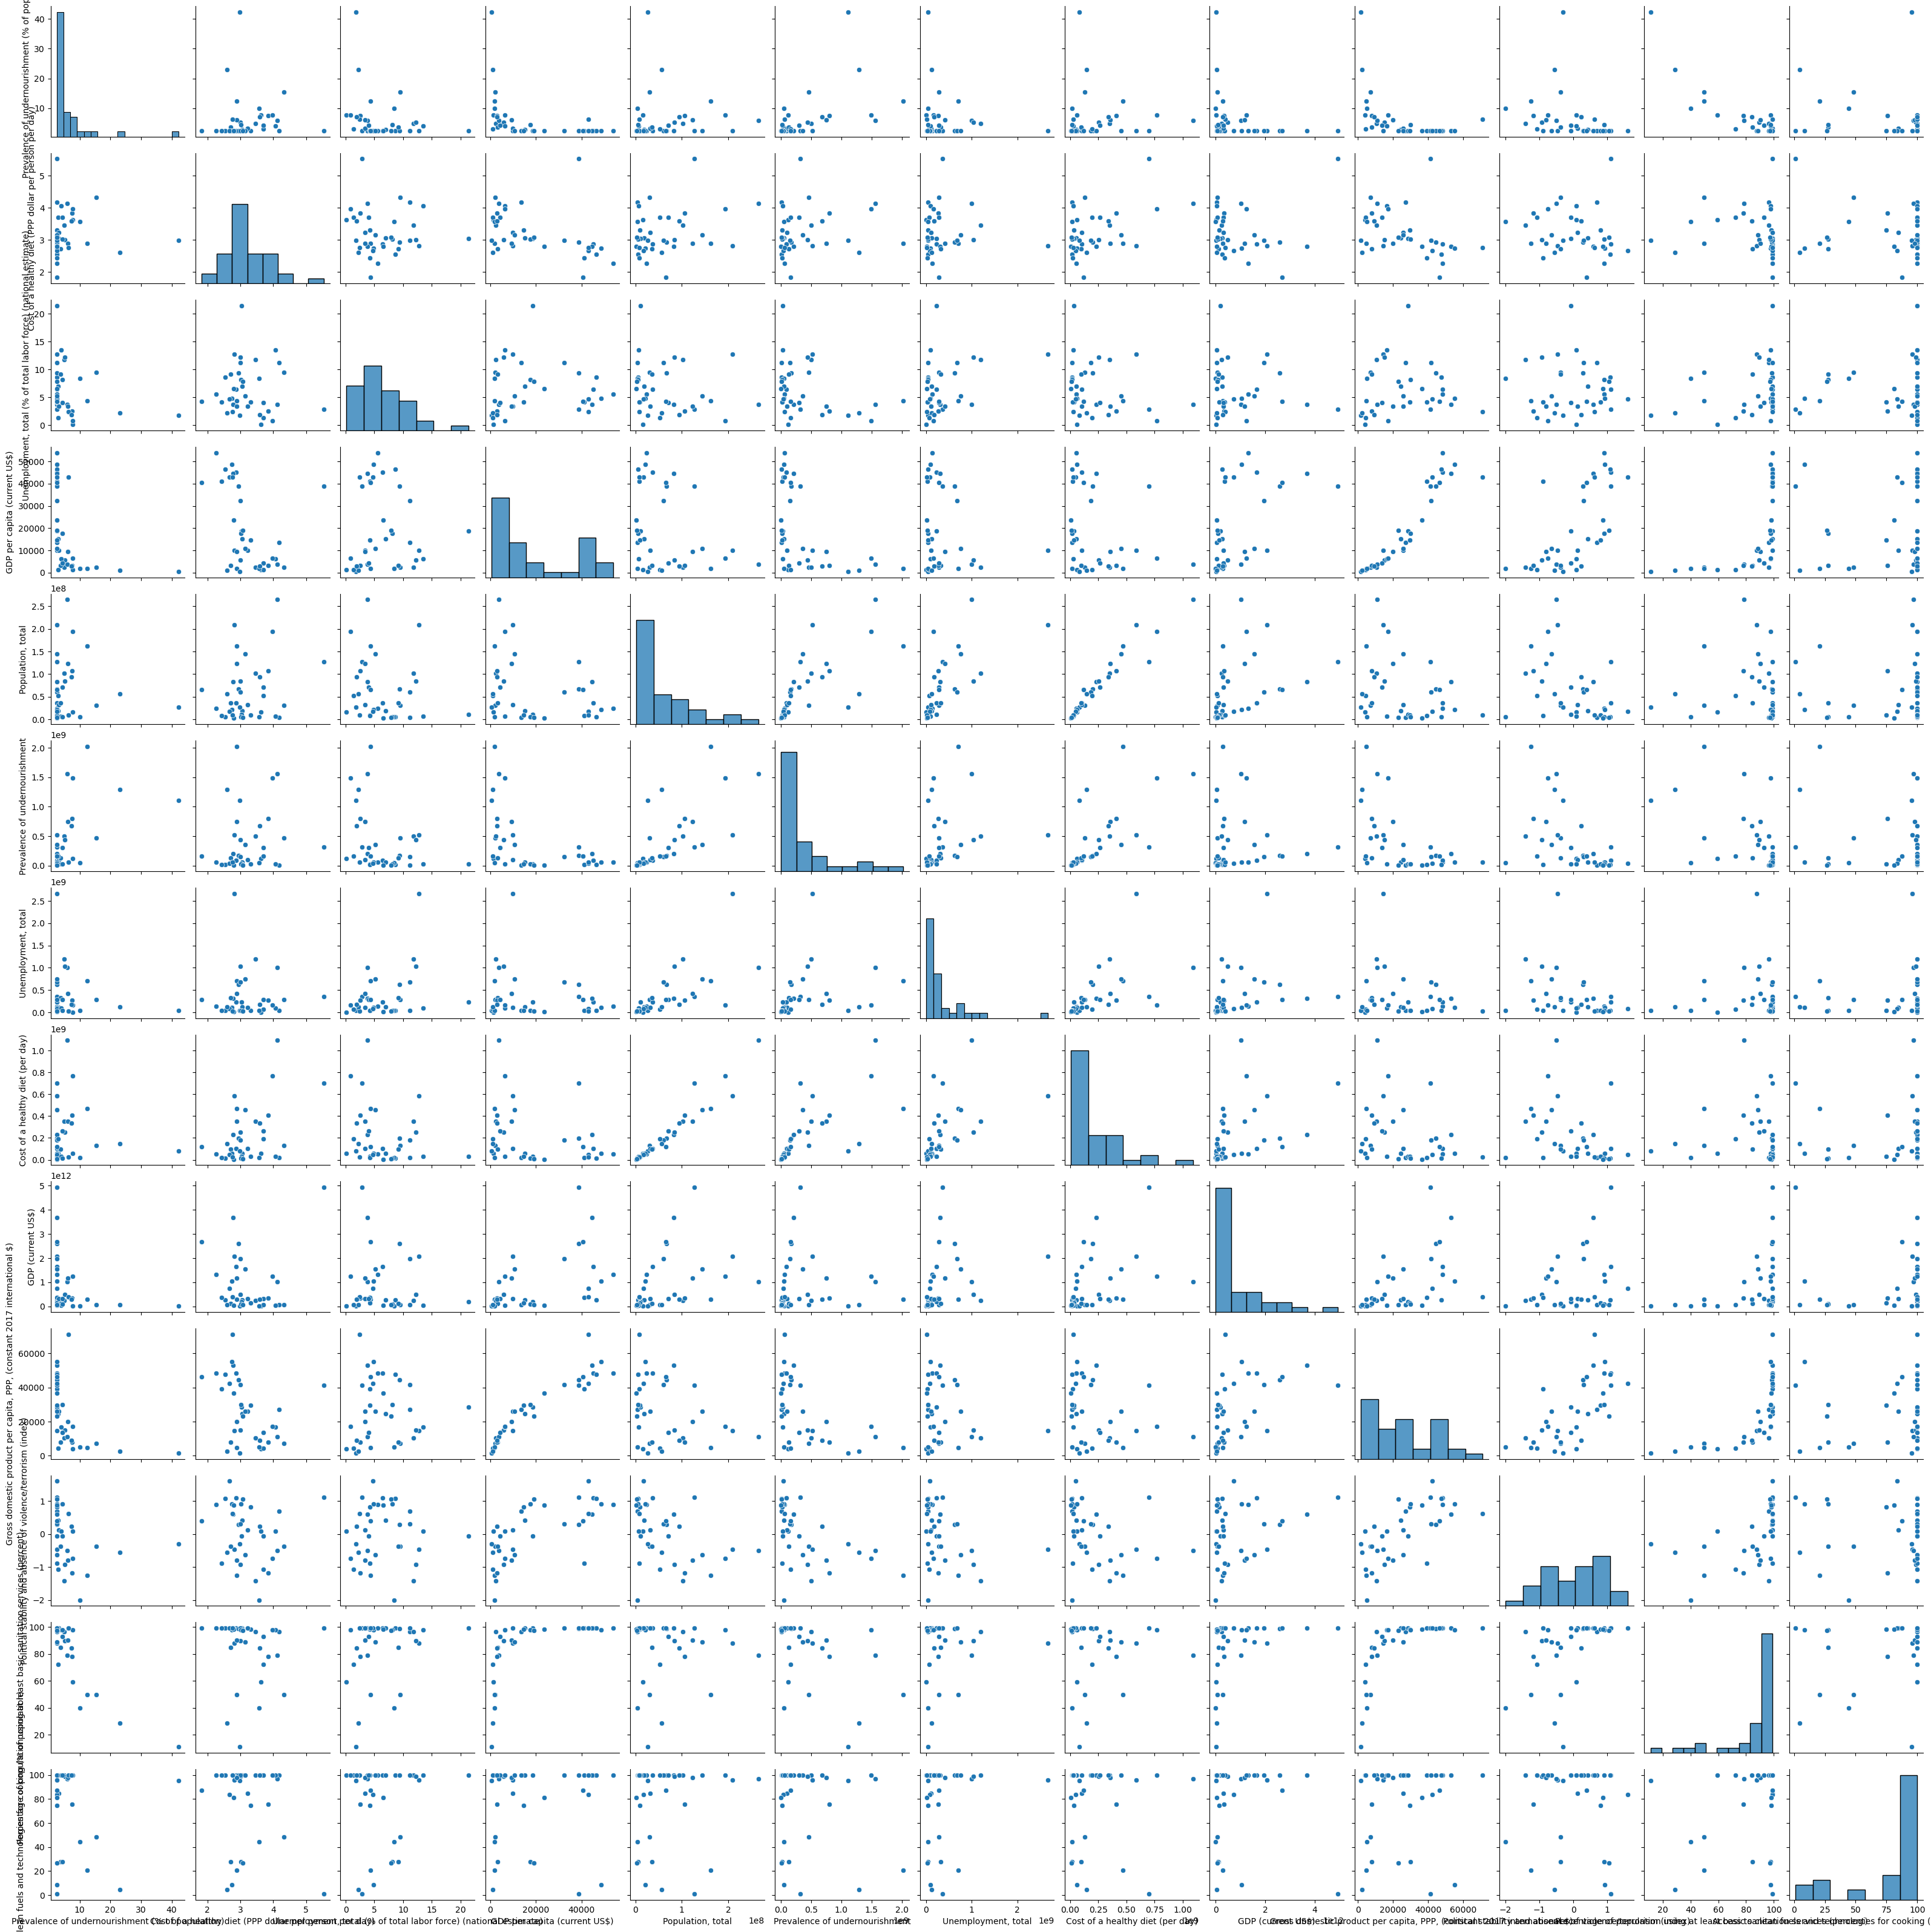

In [2]:
myplot = sns.pairplot(df)

### Features and Target Preparation

From the initial pairplots, it is evident that all feature variables have a negative correlation with the target variable, prevalence of undernourishment except for cost of a healthy diet. This is intuitive as the affordability of a healthy diet becomes worse from increasing costs, there would likely be less consumers willing and able to purchase food leading to more undernourishment. 
Some of the variables seem to show weaker correlation due to some anomaly data points and a large scatter spread. 
Based on these assumptions, we chose Unemployment, Cost of a Healthy Diet and Gross Domestic Product (GDP) as the features and Prevalenece of Undernourishment as the target.
- **Unemployment**: Reveals the number of people’s inaccessibility and unaffordability to a healthy diet
- **Cost of a Healthy Diet**: Increases in cost could indicate worsening food security while decreases could suggest improvements
- **Gross Domestic Product (GDP)**: It is a general indicator of individuals’ purchasing power. It is directly proportional to an individual’s access to a diverse diet



In [3]:
#prepare featuers and target
def get_features_targets(df, feature_names, target_names):
    # Extract features from the DataFrame based on feature_names
    df_feature = df.loc[:,feature_names]
    
    # Extract target from the DataFrame based on target_names
    df_target = df.loc[:,target_names]
    
    # Return the features and target DataFrames
    return df_feature, df_target

# Declare column features
columns = ["Unemployment, total","Cost of a healthy diet (per day)",
           "GDP (current US$)"]

# Get features and targets
df_features, df_target = get_features_targets(df, columns, ["Prevalence of undernourishment"])

### Building Model

Our data uses continuous data instead of categorical data, hence Logistic regression cannot be used for our model. Based on the plots, we believed that our data has negative linear relation, hence linear regression is used for our model.

In [4]:
#split data
def split_data(df_feature, df_target, random_state=None, test_size=0.3):
    # Get the index of the features DataFrame
    indexes = df_feature.index
    
    # Set the random seed if a random_state is provided
    if random_state != None:
        np.random.seed(random_state)
        
    # Calculate the number of samples for the test set based on the test_size
    k = int(len(indexes) * test_size)
    
    # Randomly choose 'k' samples as the test set indexes without replacement
    test_index = set(np.random.choice(indexes, size=k, replace=False))
    
    # Set of all indexes
    index = set(indexes)
    
    # Remaining indexes are for the training set
    train_index = index - test_index
    
    # Extract features and targets for the training set
    df_feature_train = df_feature.loc[train_index,:]
    df_target_train = df_target.loc[train_index,:]
    
    # Extract features and targets for the test set
    df_feature_test = df_feature.loc[test_index,:]
    df_target_test = df_target.loc[test_index,:]

    # Return the split DataFrames
    return df_feature_train, df_feature_test, df_target_train, df_target_test

def normalize_z(dfin, columns_means=None, columns_stds=None):
    # If columns_means is not provided, calculate the mean for each column
    if columns_means is None:
        columns_means = dfin.mean(axis=0)
    
    # If columns_stds is not provided, calculate the standard deviation for each column
    if columns_stds is None:
        columns_stds = dfin.std(axis=0)
        
    # Perform Z-score normalization: (value - mean) / std
    dfout = (dfin - np.array(columns_means)) / np.array(columns_stds)
    
    # Return the normalized DataFrame, calculated means, and calculated standard deviations
    return dfout, columns_means, columns_stds

def prepare_feature(df_feature):
    # Check if the input is a DataFrame
    if isinstance(df_feature, pd.DataFrame):
        
        # If DataFrame, convert to NumPy array
        np_feature = df_feature.to_numpy()
        
        # Get the number of columns in the DataFrame
        col = df_feature.shape[1]
        
    # Check if the input is a Series
    elif isinstance(df_feature, pd.Series):
        
        # If Series, convert to NumPy array
        np_feature = df_feature.to_numpy()
        
        # Set the number of columns to 1
        col = 1
    else:
        
        # If already a NumPy array, use it
        np_feature = df_feature
        
        # Get the number of columns in the NumPy array
        col = df_feature.shape[1]
    
    # Reshape the NumPy array to have a second dimension if needed
    feature = np_feature.reshape(-1,col) 
    
    # Create a column of ones (bias term)
    column_ones = np.ones((feature.shape[0],1))
    
    # Concatenate the column of ones with the feature array
    X = np.concatenate((column_ones,feature),axis=1)
    return X

def prepare_target(df_target):
    #If target is dataframe, convert to numPy
    if isinstance(df_target,pd.DataFrame):
        np_target = df_target.to_numpy()
    
    else:
        #If already numPy, use it
        np_target = df_target
    
    # Get the number of columns in the NumPy array
    col = df_target.shape[1]
    
    # Reshape the NumPy array to have a second dimension if needed
    target = np_target.reshape(-1, col)
    return target

#calculate linear regression
def calc_linreg(X, beta):
    return np.matmul(X, beta)

#Measures how well the model's prediction align with the true target values
def compute_cost_linreg(X, y, beta):
    # Initialize cost to zero
    J = 0
    
    # Get the number of training examples
    m = X.shape[0]
    
    # Calculate the predicted values (hypothesis)
    y_hat = calc_linreg(X, beta)
    
    # Calculate the error between predicted and actual values
    error = y_hat - y
    
    # Calculate the sum of squared errors
    sum_error_squared = np.matmul(error.T, error)
    
    # Calculate the cost using the mean squared error formula
    J = (1/(2*m))*sum_error_squared
    return J

#To find beta (which will be used in our model)
def gradient_descent_linreg(X, y, beta, alpha, num_iters):
    # Get the number of training examples
    m = X.shape[0]
    
    # Initialize an array to store cost values at each iteration
    J_storage = np.zeros((num_iters, 1))
    
    # Gradient Descent loop
    for n in range(num_iters):
        # Calculate predicted values (hypothesis)
        y_hat = calc_linreg(X,beta)
        
        # Calculate the error between predicted and actual values
        error = y_hat - y
        
        # Update beta using gradient descent update rule
        beta -= alpha/m*np.matmul(X.T, error)
        
        # Store the cost at each iteration
        J_storage[n] = compute_cost_linreg(X, y, beta)
        
    # Return the final beta values and the array of cost values
    return beta, J_storage

# Assign the split data to df_features_train, df_features_test, df_target_train, df_target_test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 9022, 0.3)

#Normalize features
df_features_train_z,_,_ = normalize_z(df_features_train)

#Change to numPy array and add column for feature
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

#Set number of iterations to train data
iterations = 1500
alpha = 0.01
beta = np.zeros((X.shape[1], 1))

# Get beta and J_storage from function gradient_descent_linreg
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)


C:\Users\rosha\AppData\Local\Temp\ipykernel_31296\164644225.py:23: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_train = df_feature.loc[train_index,:]
C:\Users\rosha\AppData\Local\Temp\ipykernel_31296\164644225.py:24: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_train = df_target.loc[train_index,:]
C:\Users\rosha\AppData\Local\Temp\ipykernel_31296\164644225.py:27: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_test = df_feature.loc[test_index,:]
C:\Users\rosha\AppData\Local\Temp\ipykernel_31296\164644225.py:28: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_test = df_target.loc[test_index,:]


### Evaluating the Model

We used adjusted r^2 instead of r^2 as our metrics in order to evaluate our model as r^2 tends to increase with the addition of more independent variables even if the improvement is not practically significant. Adjusted r^2 prevents an overestimation of the model’s performance by accounting for all the additional independent variables. This allows us to reach a more accurate conclusion regarding the model’s success. 
Adjusted r^2 value exists between 0 and 1. 0 or less than 0 implies the model after learning is not predicting any values in the dataset correctly. 1 implies perfect prediction of values. Usually values very close to 1 can be deceptive as it implies a relationship between the feature variables itself instead of their relationship with the target. Hence, a value above 0.7 but not very close to 1 shows that the model fits the data set reasonably accurately implying a strong multilinear regression relationship. Hence, higher the adjusted r^2 value, the better or more accurate the model is. 

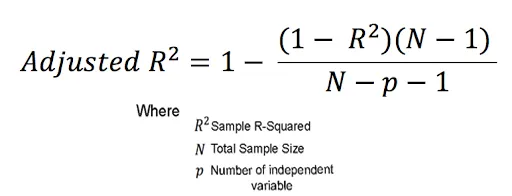

Image Taken from:- https://medium.com/analytics-vidhya/adjusted-r-squared-formula-explanation-1ce033e25699

As per the above formula, as the number of independent variables, ‘p’, increases, the adjusted r_squared decreases since the number that is subtracted from 1 increases. This would imply the model would be able to predict a lesser proportion of the complete training dataset accurately. However, along with the new variable, the R^2 value also changes, affecting the newly computed adjusted R^2.  If the R^2 value increases significantly with the increase in variables then the adjusted R^2 will also increase as per the formula above. This will be discussed later on in the discussion and Analysis of our model. 




In [5]:
def predict_linreg(df_feature, beta, means=None, stds=None):
    # Normalize the input features using the provided means and standard deviations
    norm_data, _, _ = normalize_z(df_feature, columns_means = means, columns_stds = stds)
    
    # Prepare the feature matrix for prediction
    X = prepare_feature(norm_data)
    
    # Return the calculated beta values to make predictions
    return calc_linreg(X, beta)

target_test = prepare_target(df_target_test)
pred = predict_linreg(df_features_test, beta)

def r2_score(y, ypred):
    # Calculate the mean of the actual target values (y)
    ymean = np.mean(y)
    
    # Calculate the total sum of squares (sstot)
    error_mean = y - ymean
    sstot = np.matmul(error_mean.T, error_mean)
    
    # Calculate the sum of squares of residuals (ssres)
    error = y - ypred
    ssres = np.matmul(error.T, error)
    
    # Calculate R-squared
    r2 = 1 - (ssres/sstot)
    return r2[0][0]

def adjusted_r2_score(y, ypred, beta):
    # Calculate the regular R-squared
    r2 = r2_score(y, ypred)
    
    # Calculate the number of predictors (features)
    n = beta.shape[0] - 1 
    
    # Calculate the total number of observations
    p = y.shape[0]
    
    # Calculate the adjusted R-squared
    adj_r2 = 1 - (1-r2)*(p-1)/(p-n-1)
    return r2, adj_r2

# Calculate R square and adjusted R square values
r2, adj_r2 = adjusted_r2_score(target_test, pred, beta)
print("R square:",r2)
print("Adjusted R square:",adj_r2)
print(beta)

R square: 0.7969983187553321
Adjusted R square: 0.7099975982219031
[[ 3.66858915e+08]
 [-5.52922991e+07]
 [ 4.61143971e+08]
 [-1.71684822e+08]]


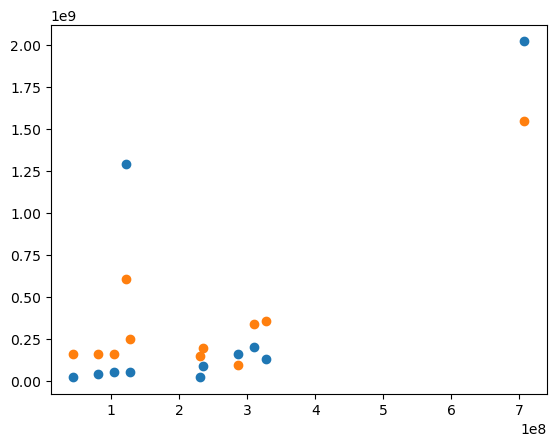

In [6]:
#Plot target_test and pred vs df_features_test["Unemployment, total"]
plt.scatter(x=df_features_test["Unemployment, total"], y=df_target_test)
plt.scatter(df_features_test["Unemployment, total"], pred)

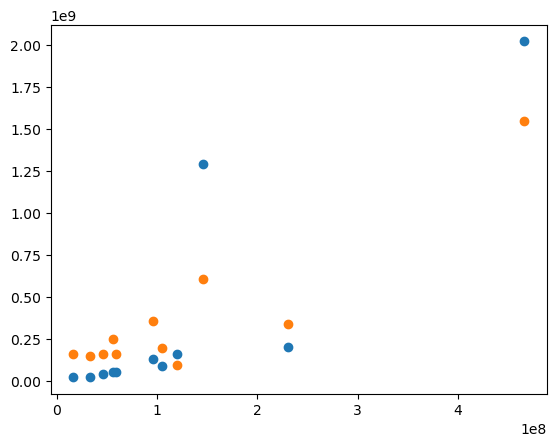

In [7]:
#Plot target_test and pred vs df_features_test["Cost of a healthy diet (per day)"]
plt.scatter(df_features_test["Cost of a healthy diet (per day)"], df_target_test)
plt.scatter(df_features_test["Cost of a healthy diet (per day)"], pred)

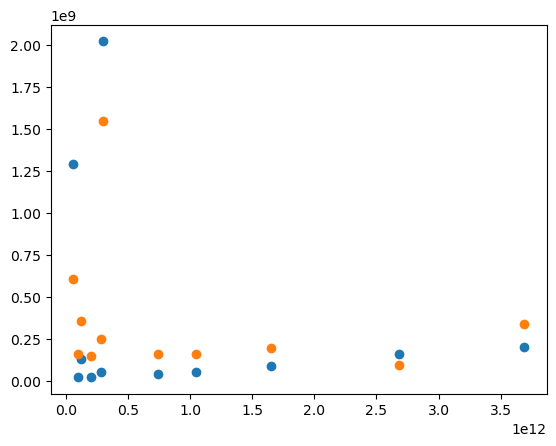

In [8]:
#Plot target_test and pred vs df_features_test["GDP (current US$)"]
plt.scatter(df_features_test["GDP (current US$)"], df_target_test)
plt.scatter(df_features_test["GDP (current US$)"], pred)

### Improving the Model

Due to the large magnitude of order of values in model 1 leading to unnecessary large errors produced by the cost function, we decided it is more appropriate to use data that is nominalized by population to ensure that the coefficients in the beta array are not abnormally high or low. 
Hence our new feature variables are GDP **per capita**, Access to cleaning sanitation services **(% of population)**, Access to clean fuel and cooking technologies **(% of population)** and Political stability and Absence of terrorism **(Normally distributed values from -2.5 to 2.5)** and our target variable to Prevalence of undernourishment **(% of population)**. 


In [9]:
# Declare new column features
columns = ["Gross domestic product per capita, PPP, (constant 2017 international $)","Political stability and absence of violence/terrorism (index)",
           "Percentage of population using at least basic sanitation services (percent)","Access to clean fuels and technologies for cooking (% of population)"]

# Get new features and target
df_features, df_target = get_features_targets(df, columns, ["Prevalence of undernourishment (% of population)"])
    
# Assign the split data to df_features_train, df_features_test, df_target_train, df_target_test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 9022, 0.3)

# Normalize features
df_features_train_z,_,_ = normalize_z(df_features_train)

# Change to numPy array and add column for feature
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

# Set number of iterations to train data
iterations = 1500
alpha = 0.01
beta = np.zeros((X.shape[1], 1))

# Get beta and J_storage from function gradient_descent_linreg
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)
target_test = prepare_target(df_target_test)
pred = predict_linreg(df_features_test, beta)

# Calculate R square and adjusted R square values
r2, adj_r2 = adjusted_r2_score(target_test, pred, beta)
print("R square:", r2)
print("Adjusted R square:", adj_r2)
print(beta)

R square: 0.9264174282351736
Adjusted R square: 0.877362380391956
[[ 6.09999827]
 [ 0.75475045]
 [ 1.33796844]
 [-7.68941787]
 [ 1.15127323]]


C:\Users\rosha\AppData\Local\Temp\ipykernel_31296\164644225.py:23: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_train = df_feature.loc[train_index,:]
C:\Users\rosha\AppData\Local\Temp\ipykernel_31296\164644225.py:24: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_train = df_target.loc[train_index,:]
C:\Users\rosha\AppData\Local\Temp\ipykernel_31296\164644225.py:27: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_test = df_feature.loc[test_index,:]
C:\Users\rosha\AppData\Local\Temp\ipykernel_31296\164644225.py:28: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_test = df_target.loc[test_index,:]


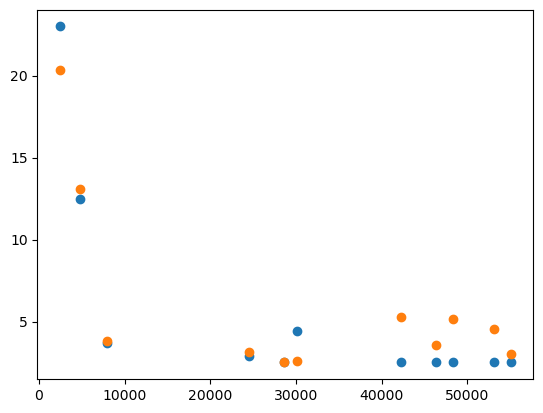

In [10]:
#Plot target_test and pred vs ["Gross domestic product per capita, PPP, (constant 2017 international $)"]
plt.scatter(df_features_test["Gross domestic product per capita, PPP, (constant 2017 international $)"], df_target_test)
plt.scatter(df_features_test["Gross domestic product per capita, PPP, (constant 2017 international $)"], pred)

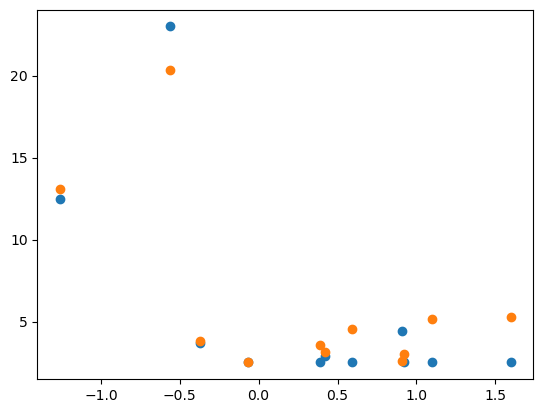

In [11]:
#Plot target_test and pred vs df_features_test["Political stability and absence of violence/terrorism (index)"]
plt.scatter(df_features_test["Political stability and absence of violence/terrorism (index)"], df_target_test)
plt.scatter(df_features_test["Political stability and absence of violence/terrorism (index)"], pred)

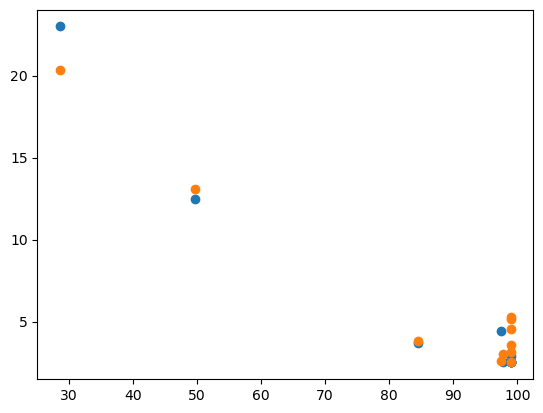

In [12]:
#Plot target_test and pred vs df_features_test["Percentage of population using at least basic sanitation services (percent)"]
plt.scatter(df_features_test["Percentage of population using at least basic sanitation services (percent)"], df_target_test)
plt.scatter(df_features_test["Percentage of population using at least basic sanitation services (percent)"], pred)

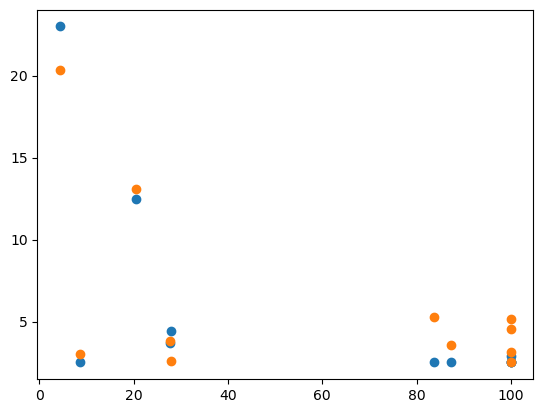

In [13]:
#Plot target_test and pred vs df_features_test["Gross domestic product per capita, PPP, (constant 2017 international $)"]
plt.scatter(df_features_test["Access to clean fuels and technologies for cooking (% of population)"], df_target_test)
plt.scatter(df_features_test["Access to clean fuels and technologies for cooking (% of population)"], pred)

### Discussion and Analysis

As can be seen in our models the adjusted r^2 value increases from 0.710 to 0.877. Although we added a new predictor variable in our improved model, the r^2 value increased significantly, causing a higher adjusted r^2 even after accounting for the increase in feature variables. This improvement implies that our model is able to predict a higher proportion of the test dataset accurately after learning from the training dataset. 

After looking at the scatter plots from the test dataset and the predicted values above, it can be concluded that most of our predicted data points are fitted near the test data points. This shows that model 2 confirms a stronger multiple linear relationship between the feature variables and target variables. 

Based on the coefficients in the beta array, Political stability and absence of terrorism has a strong influence on the change in prevalence of undernourished or the target variable. From this, it can be concluded that governments across nations must focus on a politically stable environment for their citizens to ensure food safety and avoid undernourishment. 

Although, we expected a more negative array of coefficients for this data set since we predicted that higher the GDP per capita or purchasing power, Political stability, access to clean fuels and sanitation services, the lower the prevalence of undernourished, we observe here that most coefficients are positive. This may be attributed to the random sampling of the data for training and testing or even during the data retrieval from the world bank databank stage. 

